# Detailed pipeline
This notebook details the whole pipeline.

In [1]:
# Useful starting lines
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Load the data
When loading the key dataset, we can choose whether to drop one-word sentences.  
When loading the chord dataset, we can choose whether to keep sections in major or minor key, or both.

In [2]:
from load_data import load_chord_data, load_key_data, all_composers

In [54]:
# Optional parameter for load_key_data: drop_one_worders = True/False
allcomp_key = load_key_data(all_composers)

# Optional parameter for load_chord_data: key_mode = 'both'/'major'/'minor'
allcomp_chord_major = load_chord_data(all_composers, key_mode='major')

## Apply Word2Vec
Several hyperparameters to choose.  
Next step: GloVe

In [55]:
from gensim.models import Word2Vec

In [294]:
# Ignore words with a lower frequency frequency than this
min_count = 10
# Size of the embedding space
size = 15
# Neighborhood of the focus word to study
window = 4
# 0 for CBOW, 1 for skip-gram
sg = 1
# Number of iterations (epochs)
iter = 1000

# The first argument has to be a list of lists of words
model_allcomp_major = Word2Vec(allcomp_chord_major, min_count=min_count, size=size, window=window, sg=sg, iter=iter)

## Reduce dimensionality and visualise
We want to visualise the chord vectors: we have to apply some dimensionality-reduction scheme.

### Reduce dimensionality: PCA / TSNE
PCA is more simple and immediate, but may require a high dimension to faithfully depict similarities.  
TSNE is non-linear, but is explicitly designed to preserve as much of the original structure as possible.

In [295]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from reduce_dim import reduce_dim_keyed_vec

In [296]:
n_components = 2

pca = PCA(n_components=n_components)
tsne = TSNE(n_components=n_components, learning_rate=100, n_iter=50000, n_iter_without_progress=10000)
isomap = Isomap(n_components=n_components, metric='euclidean')
wv_red = reduce_dim_keyed_vec(model_allcomp_major.wv, isomap.fit_transform, comps_to_keep=[0,1])

In [297]:
print(pca.components_[0])
print(pca.components_[1])
print(pca.explained_variance_ratio_)

AttributeError: 'PCA' object has no attribute 'components_'

### Visualise
Scatter dimensionality-reduced points.  
The shape of the marker indicates the key mode of the section containing the chord (major/minor/unspecified).  
The colour of the marker indicates the base degree of the chord.

In [298]:
from visual import visual_reduced_chord_vectors

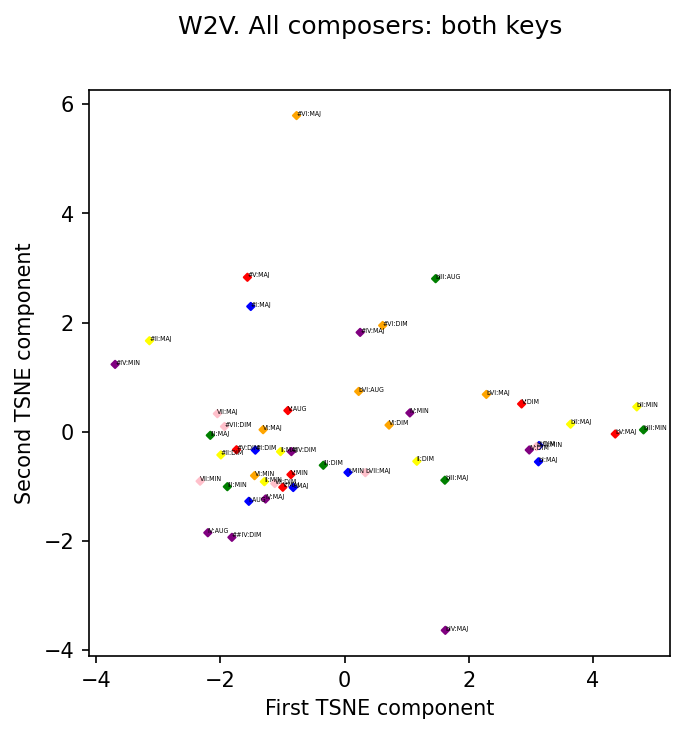

In [299]:
visual_reduced_chord_vectors(wv_red, dimred_method='TSNE', plot_title='W2V. All composers: both keys', 
                             chord_types_to_label=[':'], chord_types_not_to_label=[], 
                             marker_size=6, label_size=3, remove_key_mode=True, figsize=(5, 5), dpi=150)

## Investigate similarities

In [51]:
model_allcomp_both.wv.similarity('MAJOR;I:MAJ', 'MAJOR;V:MAJ')

0.968274

In [44]:
model_allcomp_both.wv.most_similar('MINOR;I:MIN', topn = 100)

[('MINOR;II:DIM', 0.9780309200286865),
 ('MINOR;VI:MAJ', 0.9477128386497498),
 ('MINOR;V:MAJ', 0.9467284679412842),
 ('MINOR;IV:MIN', 0.9386571645736694),
 ('MINOR;#VII:DIM', 0.9205695390701294),
 ('MINOR;VII:MAJ', 0.9083749651908875),
 ('MINOR;III:AUG', 0.9012573957443237),
 ('MINOR;III:MAJ', 0.8960249423980713),
 ('MINOR;II:MAJ', 0.8884506225585938),
 ('MINOR;V:MIN', 0.8808671236038208),
 ('MINOR;#VI:DIM', 0.8776227235794067),
 ('MINOR;I:MAJ', 0.8765546679496765),
 ('MINOR;#IV:DIM', 0.8730600476264954),
 ('MINOR;IV:MAJ', 0.86818927526474),
 ('MINOR;VI:AUG', 0.8519258499145508),
 ('MINOR;#III:DIM', 0.8511577248573303),
 ('MINOR;#VII:MIN', 0.8372937440872192),
 ('MINOR;II:MIN', 0.8328673839569092),
 ('MINOR;#I:MAJ', 0.8313696384429932),
 ('MINOR;bVI:MAJ', 0.8263943195343018),
 ('MINOR;#IV:MIN', 0.8144881725311279),
 ('MINOR;#IV:MAJ', 0.7957642078399658),
 ('MINOR;#I:DIM', 0.7913244962692261),
 ('MINOR;bII:MAJ', 0.7746477127075195),
 ('MINOR;#V:DIM', 0.770443320274353),
 ('MINOR;VI:MIN'

In [45]:
model_allcomp_both.wv.most_similar('MAJOR;I:MAJ', topn = 10)

[('MAJOR;II:MIN', 0.9569941759109497),
 ('MAJOR;V:MAJ', 0.9563511610031128),
 ('MAJOR;VII:DIM', 0.9533799886703491),
 ('MAJOR;IV:MAJ', 0.9471485614776611),
 ('MAJOR;#IV:DIM', 0.9388571381568909),
 ('MAJOR;II:MAJ', 0.9186623096466064),
 ('MAJOR;VI:MIN', 0.9162026643753052),
 ('MAJOR;IV:AUG', 0.9111410975456238),
 ('MAJOR;III:MIN', 0.9018529653549194),
 ('MAJOR;VI:MAJ', 0.8536543846130371)]